<a href="https://colab.research.google.com/github/VenkateshMadhuvanthi/Custom_MaskRCNN/blob/master/offline_preprocessing_and_embedding_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Retriving detected objects using Gemma</h1></center>
<center><img src="https://res.infoq.com/news/2024/02/google-gemma-open-model/en/headerimage/generatedHeaderImage-1708977571481.jpg" width="400"></center>


# Introduction

Aging parents often struggle with memory, making it hard to find everyday items, which can feel overwhelming. To address this, we propose an assistive AI-powered application leveraging Gemma models and video data to answer queries like "Where did I last see my pen?". The system processes video frames, generates embeddings, and stores them in ChromaDB alongside metadata for efficient retrieval. With a simple, user-friendly interface, users can locate items quickly and independently. Designed for elderly individuals and their families, this solution fosters autonomy, eases caregiving challenges, and offers peace of mind to loved ones living abroad.

\# Using PaliGemma with 🤗 transformers

PaliGemma is a new vision language model released by Google. In this notebook, we will see how to use 🤗 transformers for PaliGemma inference.
First, install below libraries with update flag as we need to use the latest version of 🤗 transformers along with others.

Reference from  
1. Paligemma Colab : https://g.co/kgs/nrKLwTc
2. Chroma db cookbook : https://github.com/google-gemini/gemma-cookbook/blob/main/Gemma/RAG_with_ChromaDB.ipynb

In [1]:
! pip install "numpy<2.0"
! pip install opencv-python
! pip install hachoir
! pip install --upgrade gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 696.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.4/650.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.8 MB/s eta 0:00:00


In [2]:
!pip install -q -U accelerate bitsandbytes git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/

In [3]:
!pip install -Uq chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.8/459.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 23.2 MB/s eta 

PaliGemma requires users to accept Gemma license, so make sure to go to [the repository]() and ask for access. If you have previously accepted Gemma license, you will have access to this model as well. Once you have the access, login to Hugging Face Hub using `notebook_login()` and pass your access token by running the cell below.

In [4]:
from huggingface_hub import notebook_login

notebook_login()

## Step 1 : Extract Frames from Video along with Metadata

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2
import os
import json
from datetime import datetime
from hachoir.metadata import extractMetadata
from hachoir.parser import createParser

def extract_frames_from_directory(input_dir, output_dir, frame_interval=1):
    """
    Extract frames from all .MOV and .mp4 video files in a directory.
    Saves frames as images and creates metadata for each video.

    Parameters:
        input_dir (str): Directory containing video files.
        output_dir (str): Directory where extracted images will be saved.
        frame_interval (int): Save every `frame_interval`-th frame (default is 1)
    """
    # Check if input directory exists
    if not os.path.exists(input_dir):
        print(f"Error: Input directory '{input_dir}' does not exist.")
        return

    # Check if output directory exists, create if not
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Supported video formats
    supported_formats = ['.mov', '.mp4']

    # Iterate over all files in the input directory
    for filename in os.listdir(input_dir):
        file_path = os.path.join(input_dir, filename)

        # Process only .MOV and .mp4 files
        if os.path.isfile(file_path) and os.path.splitext(filename)[1].lower() in supported_formats:
            # Extract frames from the video
            extract_frames(file_path, output_dir, frame_interval)

def extract_frames(video_path, output_dir, frame_interval=1):
    """
    Extract frames from a video file and save them as images.
    Also saves metadata about the video and extraction.

    Parameters:
        video_path (str): Path to the input video file.
        output_dir (str): Directory where extracted images will be saved.
        frame_interval (int): Save every `frame_interval`-th frame (default is 1).
    """
    # Capture the video
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Unable to open video file '{video_path}'.")
        return

    # Extract video name without extension for use in frame naming
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    frame_count = 0
    saved_count = 0

    # Attempt to extract the metadata creation date if possible
    try:
        # Extract creation time from file metadata
        file_stats = os.stat(video_path)
        creation_time = datetime.fromtimestamp(file_stats.st_mtime).strftime("%Y-%m-%d %H:%M:%S")
    except Exception as e:
        print(f"Unable to extract creation date from the video file. Error: {e}")
        creation_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Initialize additional metadata values
    location = {}
    device_details = {}

    # Attempt to extract metadata using hachoir
    try:
        parser = createParser(video_path)
        if not parser:
            print(f"Unable to parse file '{video_path}'.")
        else:
            metadata = extractMetadata(parser)
            if metadata:
                for item in metadata.exportPlaintext():
                    # Extract location details
                    if "GPS" in item or "Latitude" in item or "Longitude" in item:
                        if "Latitude" in item:
                            location['latitude'] = item.split(": ")[1].strip()
                        elif "Longitude" in item:
                            location['longitude'] = item.split(": ")[1].strip()
                    # Extract device details
                    if "Make" in item or "Model" in item:
                        if "Make" in item:
                            device_details['make'] = item.split(": ")[1].strip()
                        elif "Model" in item:
                            device_details['model'] = item.split(": ")[1].strip()
    except Exception as e:
        print(f"Unable to extract additional metadata from the video file. Error: {e}")

    # Metadata dictionary to store video information
    video_metadata = {
        "video_path": video_path,
        "frame_interval": frame_interval,
        "frames_extracted": 0,
        "date_created": creation_time,
        "original_frame_count": int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        "fps": cap.get(cv2.CAP_PROP_FPS),
        "frame_names": []  # To store names of extracted frames
    }

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Save frame only if it's the nth frame based on frame_interval
        if frame_count % frame_interval == 0:
            frame_filename = f"{video_name}_frame_{frame_count:04d}.jpg"
            frame_filepath = os.path.join(output_dir, frame_filename)
            cv2.imwrite(frame_filepath, frame)
            saved_count += 1
            video_metadata["frame_names"].append(frame_filename)

        frame_count += 1

    cap.release()

    # Update metadata with the number of frames saved
    video_metadata["frames_extracted"] = saved_count

    # Save metadata to JSON file
    metadata_filename = os.path.join(output_dir, f"{video_name}_metadata.json")
    with open(metadata_filename, "w") as metadata_file:
        json.dump(video_metadata, metadata_file, indent=4)

    print(f"Done! Extracted {saved_count} frames from '{video_path}' and saved them in '{output_dir}'.")
    print(f"Metadata saved as '{metadata_filename}'.")

In [7]:
input_folder = "/content/drive/MyDrive/HomeVideos"  # Replace with your directory containing video files
output_folder = "/content/drive/MyDrive/HomeVideos/frames"  # Replace with your desired output directory
#extract_frames_from_directory(input_folder, output_folder, frame_interval=30)  # Extract every 30th frame from each video

## Step 2 : Generate Semantic Embedding of images using Gemma models

In [12]:
import torch
import numpy as np
from PIL import Image

You can load PaliGemma model and processor like below.

In [13]:
from transformers import AutoTokenizer, PaliGemmaForConditionalGeneration, PaliGemmaProcessor
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_id = "google/paligemma-3b-mix-224"
paligemma_model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16)
processor = PaliGemmaProcessor.from_pretrained(model_id)

RuntimeError: Failed to import transformers.models.auto.tokenization_auto because of the following error (look up to see its traceback):
Failed to import transformers.generation.utils because of the following error (look up to see its traceback):
No module named 'numpy.char'

The processor preprocesses both the image and text, so we will pass them.

In [11]:
# Testing the model and processor
input_text = "What is in this image?"
input_image = Image.open('/content/drive/MyDrive/HomeVideos/frames/IMG_5641_frame_0990.jpg')

In [ ]:
inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
paligemma_model.to(device)
inputs = inputs.to(dtype=paligemma_model.dtype)

with torch.no_grad():
  output = paligemma_model.generate(**inputs, max_length=496)

print(processor.decode(output[0], skip_special_tokens=True))


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


What is in this image?
A person holds a pink pen in their hand, the pen being pink and the hand holding it also being pink. The floor is made of wood and the table is made of wood. The shelf is made of wood and has a bottle on it. The bottle is white and the cap is on the bottle. The cord is white and the wire is white. The pen is in the hand and the hand is holding the pen.


In [ ]:
# read json file from output_folder
from pathlib import Path
import json
metadat_dict = {}
for json_path in Path(output_folder).glob('*json'):
  # Opening JSON file
  with open(json_path) as json_file:
      data = json.load(json_file)
      metadat_dict[json_path.stem] = data

In [ ]:
import chromadb
try:
  client = chromadb.PersistentClient(path="/content/drive/MyDrive/Home_videos/chroma_db")
except:
  pass
settings = client.get_settings()
settings.allow_reset = True
collection = client.get_or_create_collection("object_in_videos")

In [ ]:
metadata = []
image_description_collection = []
for image_path in Path(output_folder).glob('*jpg'):
    input_image = Image.open(image_path)
    inputs = processor(text=input_text, images=input_image,
                  padding="longest", do_convert_rgb=True, return_tensors="pt").to("cuda")
    inputs = inputs.to(dtype=model.dtype)
    try:
      with torch.no_grad():
        output = paligemma_model.generate(**inputs, max_length=496)
      image_description = processor.decode(output[0], skip_special_tokens=True)
      image_description_collection.append(image_description)
      video_prefix = '_'.join(image_path.stem.split('_')[:-2])
      video_metadata = metadat_dict[video_prefix+'_metadata']
      image_metadata = {}
      image_metadata['image_path'] = str(image_path)
      image_metadata['video_path'] = video_metadata['video_path']
      image_metadata['date_created'] = video_metadata['date_created']
      image_metadata['frame_id'] = int(image_path.stem.split('_')[-1])
      metadata.append(image_metadata)
    except Exception as e:
      print(f"Error processing image {image_path}: {e}")

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after tha

In [ ]:
#By default, Chroma uses the Sentence Transformers all-MiniLM-L6-v2 model to create embeddings.
collection.add(documents=image_description_collection, metadatas=metadata,
 ids=[str(i) for i in range(len(image_description_collection))])


## Step 3 : Query Semantic Embedding of images

In [ ]:
prompt_template = """
You are an assistive tool designed to answer questions with explanation and image_path of best match. Your task is to provide accurate
and relevant information based on the metadata and the description. Ensure your
answers are grounded in the provided metadata and the context of the last observed using the creation date and frame id .
return json with image_path and response.  i also want to use image path
User question: {}
Context:
{}
Video metadata:
{}

Answer:
"""



user_question = "what color is my gemma bag?"

results = collection.query(query_texts=user_question, n_results=5)

context = "\n".join(
    [f"{i+1}. {passage}" for i, passage in enumerate(results["documents"])]
)
last_observed= [(res['date_created'],res['frame_id'],res['image_path']) for res in results['metadatas'][0]]
prompt = f"{prompt_template.format(user_question, context, last_observed)}"

In [ ]:
from transformers import AutoTokenizer
import transformers
import torch
import bitsandbytes, accelerate

model = "google/gemma-2-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
    },
)

`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


The image shows a black bag with the word 'Gemma' on it.


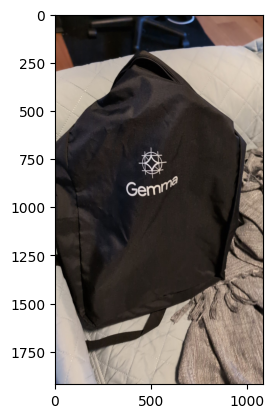

In [ ]:

import matplotlib.pyplot as plt
import json
messages = [
    {"role": "user", "content": prompt},
]
prompt = pipeline.tokenizer.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
outputs = pipeline(prompt, max_new_tokens=256, do_sample=True, temperature=0.1)
json_string = json.loads(outputs[0]["generated_text"][len(prompt):][7:-5])
plt.imshow(plt.imread(json_string['image_path']))
print(json_string['response'])
